## Test Widmark Equation
We test the standard estimated BAC equation (Widmark Equation) on our dataset to see how it compares to our model.
The equation is as follows:

(A/(w x r)) x 100
- A: ethanol in grams
- w: bodyweight in grams
- r: distribution ratio\
    -male: r = .68\
    -female: r = .55

Assume a constant rate of -0.016 BAC per hour.

[Source](https://alcohol.indianapolis.iu.edu/calculators/bac.html)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def calculate_bac(gender_male, weight_grams, ethanol_grams, hours_since_drinking=0):
    if gender_male == 1:
        r = 0.68
    else:
        r = 0.55

    bac = (ethanol_grams) * 100 / (weight_grams * r) - 0.015 * hours_since_drinking
    bac = max(bac, 0)
    bac = round(bac, 4)
    return bac

[np.float64(0.2126), np.float64(0.0877), np.float64(0.4591), np.float64(0.1891), np.float64(0.0792), np.float64(0.1571), np.float64(0.1347), np.float64(0.1297), np.float64(0.0962), np.float64(0.0825), np.float64(0.1727), np.float64(0.1621), np.float64(0.2192), np.float64(0.1292), np.float64(0.0277), np.float64(0.1037)]
Mean Squared Error: 0.009477784375
R² Score: -4.188863986313088


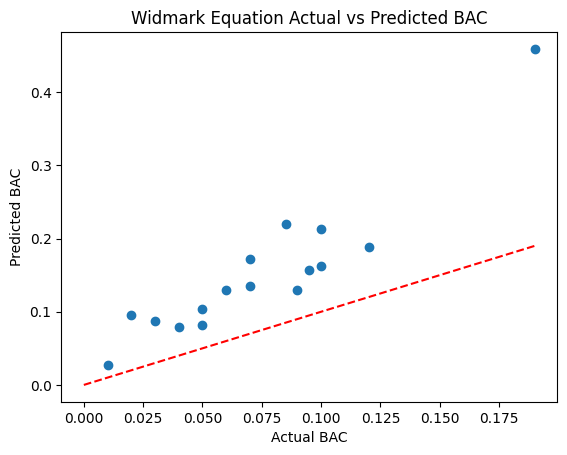

In [6]:
dataset = pd.read_csv('../data/processed/ohio_bac_dataset_processed.csv')
results = []
for index, row in dataset.iterrows():
    gender = row['Gender_male']
    weight = row['Bodyweight_grams']
    ethanol = row['Ethanol_grams']
    bac = calculate_bac(gender, weight, ethanol, hours_since_drinking=0)
    results.append(bac)
print(results)

actual_bac = dataset['BAC']

# Predicted BAC values (your results list)

# Calculate MSE and R²
mse = mean_squared_error(actual_bac, results)
r2 = r2_score(actual_bac, results)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plot Actual vs Predicted
plt.scatter(actual_bac, results)
plt.xlabel('Actual BAC')
plt.ylabel('Predicted BAC')
plt.title('Widmark Equation Actual vs Predicted BAC')
plt.plot([0, max(actual_bac)], [0, max(actual_bac)], color='red', linestyle='--')  # Perfect prediction line
plt.savefig('../output/widmark_actual_vs_predicted.png', dpi=300)
plt.show()